In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


The images are 28×28, and stored as a three-dimensional array, so we need to reshape them into a matrix. Also, we need to “one-hot” encode the class label.

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 784))
X_test = np.reshape(X_test, (X_test.shape[0], 784))

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
# Scaling the input values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
model = Sequential(
    [
        Dense(units=256, activation='relu', input_shape=(784, )),
        Dropout(rate=0.4),
        Dense(units=128, activation='relu'),
        Dropout(rate=0.3),
        Dense(units=10, activation='softmax')
    ], name='mnist_neural_network'
)

model.summary()

Model: "mnist_neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=30,
                    batch_size=128, validation_split = 0.2)

Epoch 1/30
375/375 [==============================] - 1s 2ms/step - loss: 0.4269 - accuracy: 0.8706 - val_loss: 0.1645 - val_accuracy: 0.9503
Epoch 2/30
375/375 [==============================] - 1s 2ms/step - loss: 0.2010 - accuracy: 0.9396 - val_loss: 0.1198 - val_accuracy: 0.9640
Epoch 3/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1555 - accuracy: 0.9538 - val_loss: 0.1050 - val_accuracy: 0.9698
Epoch 4/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1299 - accuracy: 0.9612 - val_loss: 0.1077 - val_accuracy: 0.9699
Epoch 5/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1152 - accuracy: 0.9657 - val_loss: 0.0952 - val_accuracy: 0.9722
Epoch 6/30
375/375 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9690 - val_loss: 0.0948 - val_accuracy: 0.9754
Epoch 7/30
375/375 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9715 - val_loss: 0.0927 - val_accuracy: 0.9758
Epoch 

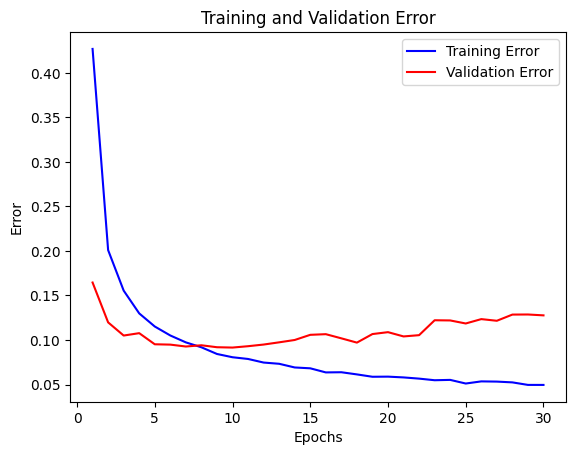

In [7]:
train_errors = history.history['loss']
val_errors = history.history['val_loss']

epochs = np.arange(1, len(train_errors)+1)
plt.plot(epochs, train_errors, 'b-', label='Training Error')
plt.plot(epochs, val_errors, 'r-', label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

In [11]:
model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 0s 397us/step - loss: 0.1051 - accuracy: 0.9804


0.980400025844574